# NLP Analysis - Profit Warnings

First, let's upload the data and define our raw data:
- **Date**: Conference Call Transcript Date
- **Month**:Conference Call Transcript Month
- **Year**: Conference Call Transcript Year
- **Name**: Company Name
- **Period**: Transcript Period
- **Target**: Response Variable. 1 is a profit warning company and 0 is a non-profit-warning company 
- **Text**: Transcript in list format per company (each row contains a list with each element as a sentence of the transcript)
- **Text_str**: Transcript in string format per company (each row contains a string with the whole call transcript)


In [3]:
import pandas as pd
# Note: import new json with new variables calculated below in order to save time:
data_new_var=pd.read_json('data_new_var.json')
data = data_new_var

In [2]:
data.head()

,ARI_Grade_idx,ARI_Grade_idx_MD,ARI_Grade_idx_QA,Best_Grade_idx,Best_Grade_idx_MD,Best_Grade_idx_QA,CL_Grade_idx,CL_Grade_idx_MD,CL_Grade_idx_QA,DC_dif_words,...,v_neg_MD,v_neg_QA,v_neu,v_neu_MD,v_neu_QA,v_pos,v_pos_MD,v_pos_QA,w_mod_perc_abs,w_mod_perc_rel
0,9.8,14.7,8.2,6th and 7th grade,14th and 15th grade,8th and 9th grade,10.44,14.79,8.99,1434,...,0.075000,0.056035,0.884582,0.865232,0.891032,0.209996,0.167582,0.227537,0.008311,0.076441
1,10.3,11.2,9.8,9th and 10th grade,8th and 9th grade,9th and 10th grade,10.27,11.83,9.11,1094,...,0.068333,0.070927,0.889753,0.878714,0.894626,0.209935,0.172667,0.231835,0.008029,0.077821
10,9.2,9.5,9.4,9th and 10th grade,6th and 7th grade,8th and 9th grade,9.68,11.88,8.94,1077,...,0.057636,0.047297,0.898970,0.888130,0.902747,0.173169,0.186421,0.168327,0.007029,0.073469
11,9.5,10.3,9.1,8th and 9th grade,7th and 8th grade,9th and 10th grade,10.61,11.83,9.97,1190,...,0.038062,0.068679,0.878194,0.899258,0.870099,0.206918,0.143557,0.235548,0.006559,0.073214
12,10.4,11.5,9.4,8th and 9th grade,9th and 10th grade,9th and 10th grade,11.19,12.76,9.80,1256,...,0.034550,0.041545,0.853816,0.879840,0.840739,0.257743,0.166529,0.315710,0.004388,0.042925


In [5]:
# wARNING: DO NOT RUN THIS CELL IF YOU HAVE ALREADY UPLOAD data_new_var.json
import pandas as pd
import numpy as np
import datetime as datetime
import re
from textstat.textstat import textstat # https://pypi.python.org/pypi/textstat

data=pd.read_json('data.json')
# let's create another version for Text 
data['Text_QA']= [get_QA('||'.join(x)).split('||') for x in data.loc[:,'Text']]
data['Text_MD']= [get_MD('||'.join(x)).split('||') for x in data.loc[:,'Text']]

data['Text_str'] = map(lambda x: ' '.join(x).encode('utf-8','ignore'),list(data.loc[:,'Text'])) 

data['Size'] = [len(x) for x in data['Text_str']] 
data['Size_QA']= [len(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Size_MD']= [len(x) for x in map(get_MD,data.loc[:,'Text_str'])]
# Because our prof warning companies issued PW between Oct-16 and March 2017, we only want to analyze prior transcripts:
data = data[(data['Period']!='Q42016')] #eliminate Q42016
data = data[(data['Year']!=2017)]  # eliminate 2016
data = data[(data['Year']==2016)]  # analyze only 2016 except for Q416
# after filtering you need a new index:
data['index']= range(0,len(data),1)
data.set_index('index',inplace=True)
data.index.rename(None,'ignore')

NameError: name 'get_QA' is not defined

In [3]:
data.groupby('Target').count()

,ARI_Grade_idx,ARI_Grade_idx_MD,ARI_Grade_idx_QA,Best_Grade_idx,Best_Grade_idx_MD,Best_Grade_idx_QA,CL_Grade_idx,CL_Grade_idx_MD,CL_Grade_idx_QA,DC_dif_words,...,v_neg_MD,v_neg_QA,v_neu,v_neu_MD,v_neu_QA,v_pos,v_pos_MD,v_pos_QA,w_mod_perc_abs,w_mod_perc_rel
Target,,,,,,,,,,,,,,,,,,,,,
0,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1,42,42,42,42,42,42,42,42,42,42,...,42,41,42,42,42,42,42,41,42,42


In [4]:
data.head()

,ARI_Grade_idx,ARI_Grade_idx_MD,ARI_Grade_idx_QA,Best_Grade_idx,Best_Grade_idx_MD,Best_Grade_idx_QA,CL_Grade_idx,CL_Grade_idx_MD,CL_Grade_idx_QA,DC_dif_words,...,v_neg_MD,v_neg_QA,v_neu,v_neu_MD,v_neu_QA,v_pos,v_pos_MD,v_pos_QA,w_mod_perc_abs,w_mod_perc_rel
0,9.8,14.7,8.2,6th and 7th grade,14th and 15th grade,8th and 9th grade,10.44,14.79,8.99,1434,...,0.075000,0.056035,0.884582,0.865232,0.891032,0.209996,0.167582,0.227537,0.008311,0.076441
1,10.3,11.2,9.8,9th and 10th grade,8th and 9th grade,9th and 10th grade,10.27,11.83,9.11,1094,...,0.068333,0.070927,0.889753,0.878714,0.894626,0.209935,0.172667,0.231835,0.008029,0.077821
10,9.2,9.5,9.4,9th and 10th grade,6th and 7th grade,8th and 9th grade,9.68,11.88,8.94,1077,...,0.057636,0.047297,0.898970,0.888130,0.902747,0.173169,0.186421,0.168327,0.007029,0.073469
11,9.5,10.3,9.1,8th and 9th grade,7th and 8th grade,9th and 10th grade,10.61,11.83,9.97,1190,...,0.038062,0.068679,0.878194,0.899258,0.870099,0.206918,0.143557,0.235548,0.006559,0.073214
12,10.4,11.5,9.4,8th and 9th grade,9th and 10th grade,9th and 10th grade,11.19,12.76,9.80,1256,...,0.034550,0.041545,0.853816,0.879840,0.840739,0.257743,0.166529,0.315710,0.004388,0.042925


In [5]:
print(data.columns)
print(data.shape)

Index([u'ARI_Grade_idx', u'ARI_Grade_idx_MD', u'ARI_Grade_idx_QA',
       u'Best_Grade_idx', u'Best_Grade_idx_MD', u'Best_Grade_idx_QA',
       u'CL_Grade_idx', u'CL_Grade_idx_MD', u'CL_Grade_idx_QA',
       u'DC_dif_words', u'DC_dif_words_MD', u'DC_dif_words_QA', u'DC_idx',
       u'DC_idx_MD', u'DC_idx_QA', u'Date', u'FE_idx', u'FE_idx_MD',
       u'FE_idx_QA', u'FK_Grade_idx', u'FK_Grade_idx_MD', u'FK_Grade_idx_QA',
       u'GFox_Grade_idx', u'GFox_Grade_idx_MD', u'GFox_Grade_idx_QA',
       u'LW_Grade_idx', u'LW_Grade_idx_MD', u'LW_Grade_idx_QA', u'Month',
       u'Name', u'Num_sent', u'Num_sent_MD', u'Num_sent_QA', u'Num_syl',
       u'Num_syl_MD', u'Num_syl_QA', u'Num_words', u'Num_words_MD',
       u'Num_words_QA', u'Padding', u'Padding_MD', u'Padding_QA', u'Period',
       u'Polarity', u'Polarity_QA', u'Size', u'Size_MD', u'Size_QA',
       u'Smog_Grade_idx', u'Smog_Grade_idx_MD', u'Smog_Grade_idx_QA',
       u'Subjectivity', u'Subjectivity_QA', u'Target', u'Text', u'Text_MD',


In [6]:
data.groupby('Target').agg('count')['Date']

Target
0    51
1    42
Name: Date, dtype: int64

## Part 1 - Readability Analysis using textstat

http://www.readabilityformulas.com/free-readability-formula-tests.php

Texstat library allows to analyze several dimensions of a text and automatically calculates multiple readibility indices:

- **Flesch Reading Ease (1948)**: Purpose: DoD materials and Life Insurance docs. Range 0-100 where 90-100 (Very easy) and 0-30 (Very Confusing). The index has been reversed - 0-10 (Very Easy) and 90-100 (Very Difficult) in order to homogeneize with all the other indicators below that follow the rule: "the higher the index, the more difficult".  
http://www.readabilityformulas.com/flesch-reading-ease-readability-formula.php
- **Dale Chall Readability Score (1948, revised 1995)**: Purpose: Overall use as it is based on popular Word Familiarity, rather than syllable or letter. Range 0-10 with 4.9 or lower (Very Easy) and 9-10 (Very Difficult)
http://www.readabilityformulas.com/new-dale-chall-readability-formula.php
- **Dale Chall Readibility Score difficult Words**: number of words considered difficult by Dale Chall criteria.
https://www.rfp-templates.com/research-articles/dale-chall-3000-simple-word-list


- **Smog Index (1969)**: Purpose: checking health messages and consumer-oriented healthcare materials. Score is tantamount to the required nth grade education for readers.
http://www.readabilityformulas.com/smog-readability-formula.php
- **Flesh Kincade Grade (1976)'**: US Navy purposes. Score is tantamount to the required nth grade education for readers.  
http://www.readabilityformulas.com/flesch-grade-level-readability-formula.php
- **Coleman Liau Index (1975)**: Purpose: Public School textbooks readibility. Score is tantamount to the required nth grade education for readers.  
http://www.readabilityformulas.com/coleman-liau-readability-formula.php
- **Automatic Readability Index (1967)**:Purpose: General Text Readability Analysis. ARI formula outputs a number which approximates the grade level needed to comprehend the text. .  
http://www.readabilityformulas.com/automated-readability-index.php
- **Linsear Write Formula**: Purpose: US Air Force manuals. Score is tantamount to the required nth grade education for readers.    
http://www.readabilityformulas.com/linsear-write-readability-formula.php
- **Gunning Fog Index (1952)**: Purpose: Newspaper and Magazine readibility analysis.Score is tantamount to the required nth grade education for readers.  
http://www.readabilityformulas.com/gunning-fog-readability-formula.php
- **Text Standard**: textstat score based on all the above tests returning the best grade level under which the given text belongs to.


**Here is a breakdown of grade levels in the U.S.:**
- 5-6 yrs. old — Kindergarten
- 6-7 yrs. old — First Grade
- 7-8 yrs. old — Second Grade
- 8-9 yrs. old — Third Grade
- 9-10 yrs. old — Fourth Grade
- 10-11 yrs. old — Fifth Grade
- 11-12 yrs. old — Sixth Grade
- 12-13 yrs. old — Seventh Grade
- 13-14 yrs. old — Eighth Grade
- 14-15 yrs. old — Ninth Grade
- 15-16 yrs. old — Tenth Grade
- 16-17 yrs. old — Eleventh grade
- 17-18 yrs. old — Twelfth grade
- 18-22 yrs. old - College

A first test about the texy readability using Python's textstat library with the first observation is shown below:

In [25]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# percentage of words that are considered stopwords
def padding(text):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords = [x.encode('utf-8','ignore') for x in stopwords]
    text= re.findall('[A-z]+',text)
    content = [w for w in text if w.lower() in stopwords] # you can calculate %stopwords using "in"
    return round(float(len(content)) / len(text),2)

In [10]:
! pip2 install textstat

In [20]:
# Analysis using textstat
from textstat import textstat
company_name =data.loc[0,'Name']
period =data.loc[0,'Period']
test_data = data.loc[0,'Text_str']

print company_name, period
print '*'*65
print 'Basic Info' 
print '*'*65
print 'Syllabe Count', textstat.syllable_count(test_data) # syllabes in text
print 'Lexicon Count', textstat.lexicon_count(test_data) # word in text
print 'Sentence Count', textstat.sentence_count(test_data) # word in text
print 'Padding (Stop Words %)', padding(test_data)
print '*'*65
print 'Text Readibility Indices'
print '*'*65
print 'Flesch Reading Ease', (100 - textstat.flesch_reading_ease(test_data)) # remember we transform the original for compatibility with other indicators
print 'Dale Chall Readability Score', textstat.dale_chall_readability_score(test_data)
print 'Textstat difficult Words', textstat.difficult_words(test_data)
print '*'*65
print 'Text Readibility Grade Scores'
print '*'*65
print 'Smog Grade Index',textstat.smog_index(test_data)
print 'Flesh Kincade Grade',textstat.flesch_kincaid_grade(test_data)  
print 'Coleman Liau Index', textstat.coleman_liau_index(test_data)
print 'Automatic Readability Index', textstat.automated_readability_index(test_data)
print 'Linsear Write Formula', textstat.linsear_write_formula(test_data)
print 'Gunning Fog Index',textstat.gunning_fog(test_data)
print 'Texstat Best Score', textstat.text_standard(test_data) # textstat score based on all the above tests returning the best grade level under which the given text belongs to.

PerkinElmer, Inc. (United States)  Q42015
*****************************************************************
Basic Info
*****************************************************************
Syllabe Count 19428
Lexicon Count 13069
Sentence Count 735
Padding (Stop Words %)[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
 0.48
*****************************************************************
Text Readibility Indices
*****************************************************************
Flesch Reading Ease 38.13
Dale Chall Readability Score 5.63
Textstat difficult Words 916
*****************************************************************
Text Readibility Grade Scores
*****************************************************************
Smog Grade Index 11.6
Flesh Kincade Grade 9.1
Coleman Liau Index 9.28
Automatic Readability Index 10.2
Linsear Write Formula 8.57142857143
Gunning Fog Index 9.92
Texstat Best

Secondly, we can create a new colummn of the indicators above for the first observation/row in data: 

In [21]:
# Full Text Indicators:
data['Num_syl'] = [textstat.syllable_count(x) for x in list(data.loc[:,'Text_str'])]
data['Num_words'] = [textstat.lexicon_count(x) for x in list(data.loc[:,'Text_str'])]
data['Num_sent'] = [textstat.sentence_count(x) for x in list(data.loc[:,'Text_str'])]
data['Padding'] = [padding(x) for x in list(data.loc[:,'Text_str'])]
data['FE_idx'] = [(100 - textstat.flesch_reading_ease(x)) for x in list(data.loc[:,'Text_str'])]
data['DC_idx'] = [textstat.dale_chall_readability_score(x) for x in list(data.loc[:,'Text_str'])]
data['DC_dif_words'] = [textstat.difficult_words(x) for x in list(data.loc[:,'Text_str'])]
data['Smog_Grade_idx'] = [textstat.smog_index(x) for x in list(data.loc[:,'Text_str'])]
data['FK_Grade_idx'] = [textstat.flesch_kincaid_grade(x) for x in list(data.loc[:,'Text_str'])]
data['CL_Grade_idx'] = [textstat.coleman_liau_index(x) for x in list(data.loc[:,'Text_str'])]
data['ARI_Grade_idx'] = [textstat.automated_readability_index(x) for x in list(data.loc[:,'Text_str'])]
data['LW_Grade_idx'] = [textstat.linsear_write_formula(x) for x in list(data.loc[:,'Text_str'])]
data['GFox_Grade_idx'] = [textstat.gunning_fog(x) for x in list(data.loc[:,'Text_str'])]
data['Best_Grade_idx'] = [textstat.text_standard(x) for x in list(data.loc[:,'Text_str'])]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords i

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venugopal/nltk_data...
[nltk_data]   Package stopwords i

According to NLP and Finance research, Q&A (Question-and-Answer) Part of the Call contains more information than the first part:

In [22]:
# Split transcript in the 2 main parts:
def get_MD(text):
    pos = text.find('Question-')
    return text[:pos]
# M&A part:
def get_QA(text):
    pos = text.find('Question-and-Answer')
    return text[pos:]

In [27]:
# Management Part Indicators:
data['Num_syl_MD'] = [textstat.syllable_count(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['Num_words_MD'] = [textstat.lexicon_count(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['Num_sent_MD'] = [textstat.sentence_count(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['Padding_MD'] = [padding(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['FE_idx_MD'] = [(100 - textstat.flesch_reading_ease(x)) for x in map(get_MD,data.loc[:,'Text_str'])]
data['DC_idx_MD'] = [textstat.dale_chall_readability_score(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['DC_dif_words_MD'] = [textstat.difficult_words(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['Smog_Grade_idx_MD'] = [textstat.smog_index(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['FK_Grade_idx_MD'] = [textstat.flesch_kincaid_grade(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['CL_Grade_idx_MD'] = [textstat.coleman_liau_index(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['ARI_Grade_idx_MD'] = [textstat.automated_readability_index(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['LW_Grade_idx_MD'] = [textstat.linsear_write_formula(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['GFox_Grade_idx_MD'] = [textstat.gunning_fog(x) for x in map(get_MD,data.loc[:,'Text_str'])]
data['Best_Grade_idx_MD'] = [textstat.text_standard(x) for x in map(get_MD,data.loc[:,'Text_str'])]

In [28]:
# Q&A Part Indicators:
data['Num_syl_QA'] = [textstat.syllable_count(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Num_words_QA'] = [textstat.lexicon_count(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Num_sent_QA'] = [textstat.sentence_count(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Padding_QA'] = [padding(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['FE_idx_QA'] = [(100 - textstat.flesch_reading_ease(x)) for x in map(get_QA,data.loc[:,'Text_str'])]
data['DC_idx_QA'] = [textstat.dale_chall_readability_score(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['DC_dif_words_QA'] = [textstat.difficult_words(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Smog_Grade_idx_QA'] = [textstat.smog_index(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['FK_Grade_idx_QA'] = [textstat.flesch_kincaid_grade(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['CL_Grade_idx_QA'] = [textstat.coleman_liau_index(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['ARI_Grade_idx_QA'] = [textstat.automated_readability_index(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['LW_Grade_idx_QA'] = [textstat.linsear_write_formula(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['GFox_Grade_idx_QA'] = [textstat.gunning_fog(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Best_Grade_idx_QA'] = [textstat.text_standard(x) for x in map(get_QA,data.loc[:,'Text_str'])]

### Univariate Analysis

There are several observations after conducting univariate analysis of the majority of indicators above against the target variable (0 is a non-profit warning stock and 1 a profit warning company):
- Number of Syllables and difficult words: profit-warning companies seem to have less syllables in both the MD (Management Discussion Part) and Q&A (Question-and-Answers) part. However, MD part median seems inflated for profit-warning firms suggesting there is a possibility that managers in trouble increase their language complexity. 
- Padding: None of the classes display a particular higher or lower percentage of stopwords.
- Dale-Chall number of difficult words: There seems to be no relation between difficult words (Dale-Chall criterion) and the possibility that a company could issue a profit warning in the near future. 
- Readability Indices: Overall profit warning stocks exhibit higher scores - more difficult readability - than non-profit warning companies in the sample. However, the gap between classess is minimum when correcting by standard deviation levels thus one cannot vehemently affirm that readability plays a pivotal and significant role in profit warning predictability. 

In [29]:
data.groupby('Target').agg(['mean','median','std'])[['Num_syl','Num_syl_MD','Num_syl_QA']]

Num_syl                       Num_syl_MD                      \
                mean median          std         mean median          std   
Target                                                                      
0       15684.607843  14484  6089.206448  6281.254902   5035  5239.463491   
1       12768.285714  13846  4270.364852  5475.071429   5478  1663.305868   

         Num_syl_QA                       
               mean  median          std  
Target                                    
0       9404.352941  9136.0  2067.162662  
1       7294.214286  7582.5  3208.230867

In [30]:
data.groupby('Target').agg(['mean','median','std'])[['Padding','Padding_MD','Padding_QA']]

Padding                  Padding_MD                  Padding_QA  \
            mean median       std       mean median       std       mean   
Target                                                                     
0       0.487059   0.48  0.029346   0.440000   0.42  0.053442   0.509216   
1       0.480238   0.48  0.021355   0.428571   0.42  0.037843   0.506667   

                         
       median       std  
Target                   
0        0.51  0.026218  
1        0.51  0.045781

In [31]:
data.groupby('Target').agg(['mean','median','std'])[['FE_idx','FE_idx_MD','FE_idx_QA']]

FE_idx                    FE_idx_MD                   FE_idx_QA  \
             mean  median       std       mean  median       std      mean   
Target                                                                       
0       37.210588  37.520  6.419229  46.150980  47.610  9.290867  32.54451   
1       40.589762  39.755  4.532225  52.811905  53.395  8.032781  36.04000   

                           
        median        std  
Target                     
0       31.300   5.364977  
1       31.245  24.899146

In [32]:
data.groupby('Target').agg(['mean','median','std'])[['DC_idx','DC_idx_MD','DC_idx_QA']]

DC_idx                  DC_idx_MD                  DC_idx_QA         \
            mean median       std      mean median       std      mean median   
Target                                                                          
0       5.692157   5.73  0.608054  6.620588   6.64  0.495675  5.767255  5.700   
1       6.014762   5.92  0.392573  6.959286   6.92  0.460696  6.041905  5.845   

                  
             std  
Target            
0       0.310490  
1       0.923272

In [33]:
data.groupby('Target').agg(['mean','median','std'])[['DC_dif_words','DC_dif_words_MD','DC_dif_words_QA']]

DC_dif_words                    DC_dif_words_MD                     \
               mean median         std            mean median         std   
Target                                                                      
0        759.137255    747  189.573207      445.215686  395.0  197.698691   
1        693.095238    705  176.228761      452.500000  477.5  106.544906   

       DC_dif_words_QA                     
                  mean median         std  
Target                                     
0           493.098039    483  100.129168  
1           409.642857    436  145.388768

In [34]:
data.groupby('Target').agg(['mean','median','std'])[['Smog_Grade_idx','Smog_Grade_idx_MD','Smog_Grade_idx_QA']]

Smog_Grade_idx                  Smog_Grade_idx_MD                   \
                 mean median       std              mean median       std   
Target                                                                      
0           11.700000  11.60  1.059056         12.990196   13.0  1.498433   
1           12.169048  12.15  0.597347         13.947619   14.0  1.160159   

       Smog_Grade_idx_QA                   
                    mean median       std  
Target                                     
0              10.992157   10.8  0.922354  
1              10.664286   10.9  1.767294

In [35]:
data.groupby('Target').agg(['mean','median','std'])[['GFox_Grade_idx','GFox_Grade_idx_MD','GFox_Grade_idx_QA']]

GFox_Grade_idx                  GFox_Grade_idx_MD                   \
                 mean median       std              mean median       std   
Target                                                                      
0           10.784314  10.45  1.958231         13.400392  13.00  2.460249   
1           11.571429  11.22  1.326747         14.655238  14.89  1.399134   

       GFox_Grade_idx_QA                   
                    mean median       std  
Target                                     
0              10.610196  10.05  1.976074  
1              11.119048  10.52  1.986523

## Hierarchical Clustering

In [36]:
data.columns

Index([u'ARI_Grade_idx', u'ARI_Grade_idx_MD', u'ARI_Grade_idx_QA',
       u'Best_Grade_idx', u'Best_Grade_idx_MD', u'Best_Grade_idx_QA',
       u'CL_Grade_idx', u'CL_Grade_idx_MD', u'CL_Grade_idx_QA',
       u'DC_dif_words', u'DC_dif_words_MD', u'DC_dif_words_QA', u'DC_idx',
       u'DC_idx_MD', u'DC_idx_QA', u'Date', u'FE_idx', u'FE_idx_MD',
       u'FE_idx_QA', u'FK_Grade_idx', u'FK_Grade_idx_MD', u'FK_Grade_idx_QA',
       u'GFox_Grade_idx', u'GFox_Grade_idx_MD', u'GFox_Grade_idx_QA',
       u'LW_Grade_idx', u'LW_Grade_idx_MD', u'LW_Grade_idx_QA', u'Month',
       u'Name', u'Num_sent', u'Num_sent_MD', u'Num_sent_QA', u'Num_syl',
       u'Num_syl_MD', u'Num_syl_QA', u'Num_words', u'Num_words_MD',
       u'Num_words_QA', u'Padding', u'Padding_MD', u'Padding_QA', u'Period',
       u'Polarity', u'Polarity_QA', u'Size', u'Size_MD', u'Size_QA',
       u'Smog_Grade_idx', u'Smog_Grade_idx_MD', u'Smog_Grade_idx_QA',
       u'Subjectivity', u'Subjectivity_QA', u'Target', u'Text', u'Text_MD',


Firstly, we conduct clustering analysis using two representative readability indices such as FE_idx and ARI_idx:

In [37]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()
data_idx= data.loc[:,['FE_idx','ARI_Grade_idx','Target']] # 'FE_idx', 'Size_QA', ARI_Grade_idx'
hier.set_params(n_clusters = 2)
hier.fit(data_idx)



AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x10d1e3de8>)

There seems to be two differentiated groups within our sample, Are they representative of our pw and non-pw classes?

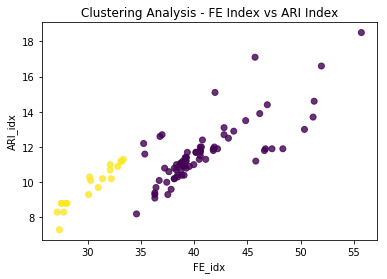

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


labels = hier.labels_

plt.title('Clustering Analysis - FE Index vs ARI Index')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['FE_idx'], data_idx['ARI_Grade_idx'], c = labels, alpha = 0.8)
plt.xlabel('FE_idx')
plt.ylabel('ARI_idx')
#plt.xlim([0,.15])
# plt.ylim([5,15])
plt.show()

The charts below show a lot of overlapping between our cluster groups and pw/npw classes thus whatever subgroups the clustering method is suggesting, they have nothing to do with the probability of being a profit warning company

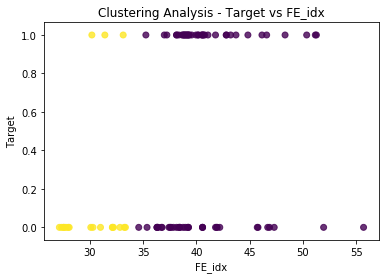

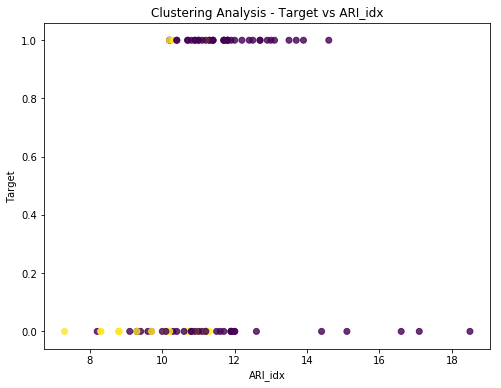

In [39]:
plt.title('Clustering Analysis - Target vs FE_idx')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['FE_idx'], data_idx['Target'], c = labels, alpha = 0.8)
plt.xlabel('FE_idx')
plt.ylabel('Target')
plt.show()

plt.title('Clustering Analysis - Target vs ARI_idx')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['ARI_Grade_idx'], data_idx['Target'], c = labels, alpha = 0.8)
plt.xlabel('ARI_idx')
plt.ylabel('Target')
plt.show()


Number of difficult words and size Q&A session might be a good guess:

In [40]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()
data_idx= data.loc[:,['DC_dif_words','Size_QA','Target']] # 'FE_idx', 'Size_QA', ARI_Grade_idx'
hier.set_params(n_clusters = 2)
hier.fit(data_idx)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x10d1e3de8>)

Clustering shows that one can say using a variable

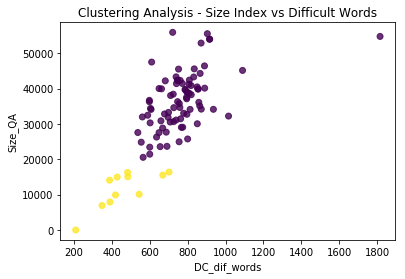

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


labels = hier.labels_

plt.title('Clustering Analysis - Size Index vs Difficult Words')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['DC_dif_words'], data_idx['Size_QA'], c = labels, alpha = 0.8)
plt.xlabel('DC_dif_words')
plt.ylabel('Size_QA')
#plt.xlim([0,.15])
# plt.ylim([5,15])
plt.show()

Comparing both Size_QA and DC_dif_words against our Target variable provides some comfort as it seems both variables are partially explaining the difference between profit warning (1) and non-profit warning(0) companies.

Main takeaway is that companies about to issue a profit warning use a more simple "plain" english language than healthy ones. Moreover, there is some research evidence about negative forward returns and managers's silence so our findings below about Size_QA confirm that shorter QA sessions are more likely to happen in profit warning candidates, yet this condition does not seem to be a causal one. 

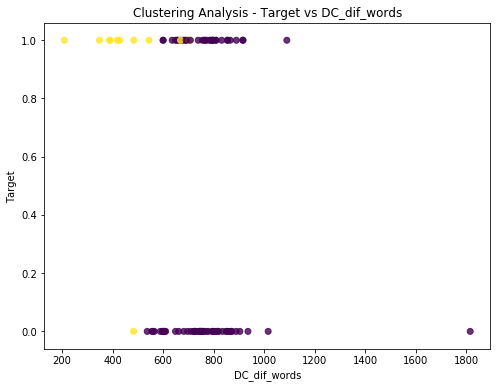

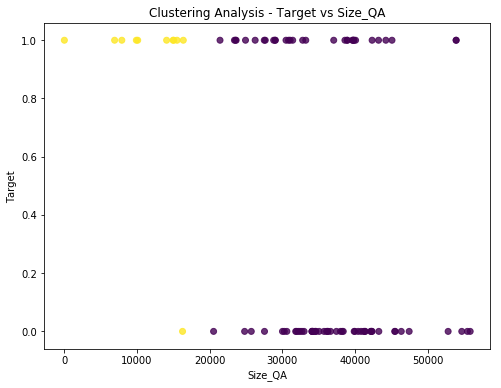

In [42]:
plt.title('Clustering Analysis - Target vs DC_dif_words')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['DC_dif_words'], data_idx['Target'], c = labels, alpha = 0.8)
plt.xlabel('DC_dif_words')
plt.ylabel('Target')
plt.show()

plt.title('Clustering Analysis - Target vs Size_QA')
plt.rcParams['figure.figsize'] = 8,6
plt.scatter(data_idx['Size_QA'], data_idx['Target'], c = labels, alpha = 0.8)
plt.xlabel('Size_QA')
plt.ylabel('Target')
plt.show()

### PCA Analysis

In [43]:
print map(lambda x: x.encode('utf-8','ignore'),data.columns)

['ARI_Grade_idx', 'ARI_Grade_idx_MD', 'ARI_Grade_idx_QA', 'Best_Grade_idx', 'Best_Grade_idx_MD', 'Best_Grade_idx_QA', 'CL_Grade_idx', 'CL_Grade_idx_MD', 'CL_Grade_idx_QA', 'DC_dif_words', 'DC_dif_words_MD', 'DC_dif_words_QA', 'DC_idx', 'DC_idx_MD', 'DC_idx_QA', 'Date', 'FE_idx', 'FE_idx_MD', 'FE_idx_QA', 'FK_Grade_idx', 'FK_Grade_idx_MD', 'FK_Grade_idx_QA', 'GFox_Grade_idx', 'GFox_Grade_idx_MD', 'GFox_Grade_idx_QA', 'LW_Grade_idx', 'LW_Grade_idx_MD', 'LW_Grade_idx_QA', 'Month', 'Name', 'Num_sent', 'Num_sent_MD', 'Num_sent_QA', 'Num_syl', 'Num_syl_MD', 'Num_syl_QA', 'Num_words', 'Num_words_MD', 'Num_words_QA', 'Padding', 'Padding_MD', 'Padding_QA', 'Period', 'Polarity', 'Polarity_QA', 'Size', 'Size_MD', 'Size_QA', 'Smog_Grade_idx', 'Smog_Grade_idx_MD', 'Smog_Grade_idx_QA', 'Subjectivity', 'Subjectivity_QA', 'Target', 'Text', 'Text_MD', 'Text_QA', 'Text_str', 'Year', 'cons_perc_abs', 'cons_perc_rel', 'int_perc_abs', 'int_perc_rel', 'irv_perc_abs', 'irv_perc_rel', 'lit_perc_abs', 'lit_per

In [44]:
# Get only readability predictors:
data_gr= data[[ 'Size', 'Num_syl', 'Num_words', 'Num_sent', 'Padding', 
               'FE_idx', 'DC_idx', 'DC_dif_words', 'Smog_Grade_idx',
               'FK_Grade_idx', 'CL_Grade_idx', 'ARI_Grade_idx', 'LW_Grade_idx', 'GFox_Grade_idx', 'Num_syl_MD', 
               'Size_MD','Num_words_MD', 'Num_sent_MD', 'Padding_MD', 'FE_idx_MD', 'DC_idx_MD', 'DC_dif_words_MD', 
               'Smog_Grade_idx_MD', 'FK_Grade_idx_MD', 'CL_Grade_idx_MD', 'ARI_Grade_idx_MD', 'LW_Grade_idx_MD', 
               'GFox_Grade_idx_MD', 'Num_syl_QA','Size_QA', 'Num_words_QA', 'Num_sent_QA', 'Padding_QA', 'FE_idx_QA', 
               'DC_idx_QA', 'DC_dif_words_QA', 'Smog_Grade_idx_QA', 'FK_Grade_idx_QA', 'CL_Grade_idx_QA', 
               'ARI_Grade_idx_QA', 'LW_Grade_idx_QA', 'GFox_Grade_idx_QA']]
len(data_gr.columns) # 42 numerical predictors
data_gr.describe() # you need to scale first

,Size,Num_syl,Num_words,Num_sent,Padding,FE_idx,DC_idx,DC_dif_words,Smog_Grade_idx,FK_Grade_idx,...,Padding_QA,FE_idx_QA,DC_idx_QA,DC_dif_words_QA,Smog_Grade_idx_QA,FK_Grade_idx_QA,CL_Grade_idx_QA,ARI_Grade_idx_QA,LW_Grade_idx_QA,GFox_Grade_idx_QA
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,56774.032258,14367.559140,9730.645161,499.698925,0.483978,38.736667,5.837849,729.311828,11.911828,9.665591,...,0.508065,34.123118,5.891290,455.408602,10.844086,8.717204,8.890000,10.261290,6.983691,10.840000
std,21679.058099,5514.295912,3848.290430,183.107641,0.026133,5.865809,0.543761,185.644470,0.907559,1.527892,...,0.036184,17.175322,0.671689,128.889929,1.371564,2.373569,3.204025,3.631775,2.686858,1.986379
min,6473.000000,1693.000000,1031.000000,46.000000,0.420000,27.130000,2.000000,209.000000,10.000000,6.900000,...,0.250000,23.750000,5.310000,1.000000,0.000000,6.200000,7.070000,7.100000,1.000000,7.910000
25%,49789.000000,12660.000000,8449.000000,444.000000,0.460000,36.300000,5.660000,649.000000,11.400000,8.800000,...,0.490000,28.760000,5.600000,407.000000,10.400000,7.600000,8.180000,8.800000,5.300000,9.660000
50%,56398.000000,14229.000000,9746.000000,510.000000,0.480000,38.940000,5.840000,746.000000,12.000000,9.400000,...,0.510000,31.300000,5.780000,452.000000,10.900000,8.300000,8.530000,9.700000,6.375000,10.270000
75%,63344.000000,16108.000000,10655.000000,583.000000,0.500000,41.080000,5.970000,809.000000,12.300000,10.200000,...,0.530000,36.300000,5.990000,532.000000,11.500000,9.100000,8.990000,10.500000,7.714286,11.410000
max,210592.000000,53687.000000,37412.000000,1510.000000,0.550000,55.690000,7.950000,1816.000000,14.500000,15.800000,...,0.560000,191.300000,11.630000,757.000000,13.400000,26.500000,39.000000,40.800000,19.666667,20.800000


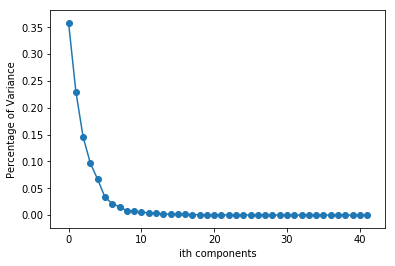

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
pca = PCA()

data_gr_s = data_gr / np.std(data_gr,0) # scaling for PCA

# Checking what number of PCs are best to wok with: 
pca.set_params(n_components = None)
pca.fit(data_gr_s)
plt.plot(range(len(data_gr_s.columns)), pca.explained_variance_ratio_)
plt.scatter(range(len(data_gr_s.columns)), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

The chart shows that 7 PCs out of 42 PCs explain 93% of the total variance. Gains in explanatory power diminish dramatically when choosing more than 7 PCs.

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca.set_params(n_components = 7) # only obtain 3 PCs = p
pca.fit(data_gr_s)

print 'Aggregated Explained Variance', 100*round(sum(pca.explained_variance_ratio_),2)
print '*'*65
print 'Explained Variance per  PC:'
print '*'*65
print pca.explained_variance_ratio_
print '*'*65
print 'PCA Eigenvectors'
print '*'*65
print pca.components_ # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs
print '*'*65
print 'PCs'
print '*'*65
print pca.transform(data_gr_s) # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs


Aggregated Explained Variance 95.0
*****************************************************************
Explained Variance per  PC:
*****************************************************************
[0.35778475 0.22990894 0.14509702 0.09606362 0.06623907 0.03286021
 0.02137918]
*****************************************************************
PCA Eigenvectors
*****************************************************************
[[-1.93943477e-01 -1.90987082e-01 -1.95995448e-01 -2.29155584e-01
  -1.13179772e-01  1.70971525e-01  2.31067496e-01 -1.55163723e-01
   1.63143862e-01  1.55737364e-01  1.73439067e-01  1.62783250e-01
   1.44654297e-03  1.83769285e-01 -1.36793735e-01 -1.39266668e-01
  -1.41722103e-01 -1.69431123e-01 -9.22838656e-02  1.34117482e-01
   1.78957079e-01 -1.04731308e-01  1.35181127e-01  1.39267898e-01
   1.06013563e-01  1.39359976e-01  1.44654297e-03  1.67904773e-01
  -1.76730383e-01 -1.78475824e-01 -1.78655691e-01 -1.81212522e-01
  -1.06977481e-01  1.46097175e-01  1.77648579e-0

In [47]:
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import sklearn.metrics as metrics

logit = lm.LogisticRegression()

pred = data_gr_s
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# PCA Training
pca.set_params(n_components = 7) # only obtain 7 PCs => from our previous analysis
pca.fit(x_train)
x_train = pca.transform(x_train) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 
x_test = pca.transform(x_test) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 

# Logit 
logit.fit(x_train, y_train)
print "The training error is: %.4f" %(1-logit.score(x_train, y_train))
print "The test error is: %.4f" %(1-logit.score(x_test, y_test))
y_train_p = logit.predict_proba(x_train)
y_test_p = logit.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.2838
The test error is: 0.3684
Training Multi Class Log_loss: 0.5496930680684823
Test Multi Class Log_loss: 0.61695078178864


/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
# Cross-Validation
import sklearn.cross_validation as cv
stratify_divide = cv.StratifiedKFold(y_train, 5, random_state=0)
scores = cv.cross_val_score(logit, x_train, y_train, cv=stratify_divide)
print 'CV Error rates per fold:', 1- scores
print 'CV Average Error', 1-np.mean(scores)
print 'CV Error Std. Dev', np.std(scores)

CV Error rates per fold: [0.26666667 0.6        0.26666667 0.33333333 0.5       ]
CV Average Error 0.3933333333333333
CV Error Std. Dev 0.13399834161494517


## Part 2 - Sentiment Analysis

Readability and sentiment are two different concepts not to be mixed in the same bag.

The library "pysentiment" helps to understand the negative and positive overtones while allowing to get info about the degree of polarity (negative, neutral or positive tone) and subjectivity (objective or subjective words and sentences): 

https://github.com/hanzhichao2000/pysentiment

Polarity and Subjectivity are calculated in the same way of Lydia system:

http://www.cs.sunysb.edu/~skiena/lydia/

The library score method yields 4 output items:

- Positive: number of positive terms according to selected dictionary 
- Negative: number of positive terms according to selected dictionary
- Polarity: spread between positive and negative tokens divided by the sum of both.
- Subjectivity: sum of positive and negative tokens divided by number of terms.

The part of the code related to the above is shown below: https://github.com/hanzhichao2000/pysentiment/blob/master/pysentiment/base.py
```
        score_li = [self._get_score(t) for t in terms]
        
        s_pos = sum([s for s in score_li if s > 0])
        s_neg = sum([s for s in score_li if s < 0]) * -1
        
        s_pol = (s_pos-s_neg) * 1.0 / ((s_pos+s_neg)+self.EPSILON)
        s_sub = (s_pos+s_neg) * 1.0 / (len(score_li)+self.EPSILON)
```
get_score(t) retrieves a term in the choosen dictionary and returns the dict positive/negative classification

**1) Using Harvard IV-4 dictionary to analyze sentiment:** 

http://www.wjh.harvard.edu/~inquirer/

In [51]:
import pysentiment as ps
company_name =data.loc[0,'Name']
period =data.loc[0,'Period']
test_data = data.loc[0,'Text_str']

hiv4 = ps.HIV4()
tokens = hiv4.tokenize(test_data) # preprocesses by the HIVA dict as this corpora contains tokenization and POS 
score = hiv4.get_score(tokens)
score # dict cont

/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


{'Negative': 523,
 'Polarity': 0.3145478372774916,
 'Positive': 1003,
 'Subjectivity': 0.27841634733106796}

**2) Using Loughran and McDonald dictionary to analyze sentiment:**

https://www3.nd.edu/~mcdonald/Word_Lists.html

2014 version extended to include words appearing in 10-K documents that are not found in the original 2of12inf word list.  In addition to providing a master word list, the dictionary includes statistics for word frequencies in all 10-Ks from 1994-2014 (including 10-X variants).  The dictionary reports counts, proportion of total, average proportion per document, standard deviation of proportion per document, document count (i.e., number of documents containing at least one occurrence of the word), nine sentiment category identifiers (e.g., negative, positive, uncertainty, litigious, modal, constraining), Harvard Word List identifier, number of syllables, and source for each word.  Detailed documentation appears here:
https://www3.nd.edu/~mcdonald/Word_Lists_files/Documentation/Documentation_LoughranMcDonald_MasterDictionary.pdf


In [52]:
import pysentiment as ps
lm = ps.LM()
tokens = lm.tokenize(test_data)
score = lm.get_score(tokens)
score

{'Negative': 131,
 'Polarity': 0.23391812797099962,
 'Positive': 211,
 'Subjectivity': 0.06239737273081602}

The LM financial dictionary is the most obvious choice to apply to our conference call transcripts' sample, particularly to the Q&A part as it is the most spontaneous portion and gathers feedback from both analysts and management:

In [53]:
def polarity(text):
    import pysentiment as ps
    lm = ps.LM()
    tokens = lm.tokenize(text)
    score = lm.get_score(tokens)
    return score['Polarity']

def subjectivity(text):
    import pysentiment as ps
    lm = ps.LM()
    tokens = lm.tokenize(text)
    score = lm.get_score(tokens)
    return score['Subjectivity']

In [54]:
data['Polarity']=[polarity(x) for x in data.loc[:,'Text_str']]
data['Subjectivity'] = [subjectivity(x) for x in data.loc[:,'Text_str']]
data['Polarity_QA']=[polarity(x) for x in map(get_QA,data.loc[:,'Text_str'])]
data['Subjectivity_QA'] = [subjectivity(x) for x in map(get_QA,data.loc[:,'Text_str'])]

Some important insights are extracted when breaking down the results by target class:
- Polarity seems to be higher for profit warning stocks, especially when checking the median. Hence, one could hint that profit warning managers seem to tune a slightly more positive tone during its preliminary quarter briefings and Q&A session. 

- Subjectivity tone seems to be the same in both classes for both full transcript and the Q&A part.

Probably this analysis will be even better should the managers and analysts being analyzed separately.

In [55]:
data.groupby('Target').agg(['mean','median','std'])[['Polarity','Subjectivity','Polarity_QA','Subjectivity_QA']]

Polarity                     Subjectivity                      \
            mean    median       std         mean    median       std   
Target                                                                  
0       0.073021  0.041096  0.149465     0.066860  0.065470  0.008834   
1       0.120969  0.131317  0.143197     0.070383  0.066805  0.010599   

       Polarity_QA                     Subjectivity_QA                      
              mean    median       std            mean    median       std  
Target                                                                      
0        -0.054299 -0.063158  0.157163        0.063408  0.060428  0.011200  
1        -0.039619 -0.009960  0.248155        0.077601  0.065890  0.067777

**Loughran and McDonald Financial Sentiment Dictionary**

The Loughran and McDonald (2011) article provides a clear demonstration that applying a general sentiment word list to accounting and finance topics can lead to a high rate of misclassification. 
- About three-fourths of the negative words in the Harvard IV TagNeg dictionary of negative words are typically not negative in a financial context. For example, words like “mine”, “cancer”, “tire” or “capital” are often used to refer to a specific industry segment. 
- These words are not predictive of the tone of documents or of financial news and simply add noise to the measurement of sentiment and attenuate its predictive value. 
- L&M created custom lists of negative and positive words specific to the accounting and financial domain. 
- Another benefit of the dictionary is that it shows additional dimensions of interest beyond the traditional dichotomy positive/negative. 
- Two noteworthy additions are the Uncertainty word list that attempts to measure the general notion of imprecision (without an explicit reference to risks), and the Litigiousness word list that may be used to identify potential legal problem situations. 
- They also included Weak Modal and Strong Modal word lists. 

```
**SCALE          SAMPLE WORDS**
*******************************************************************************************************************
Negative         termination, discontinued, penalties, misconduct, serious, deterioration, 
Positive         achieve, attain, efficient, improve, profitable
Uncertainty      approximate, contingency, depend, fluctuate, indefinite, uncertain, variability
Litigiousness    claimant, deposition, interlocutory, testimony, tort
Weak Modal       could, depending, might, possibly
Strong Modal     always, highest, must, will
```

In [56]:
import numpy as np
LM_dict=pd.read_csv('LM.csv') # 2014 downloaded from LM website

# LM categories: Negative, Positive, Uncertainty, Litigious, Constraining, Superfluous, Interesting, Modal, Irregular Verb
pos_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Positive']!=0)]['Word']))
neg_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Negative']!=0)]['Word']))
unc_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Uncertainty']!=0)]['Word']))
lit_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Litigious']!=0)]['Word']))
cons_l = map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Constraining']!=0)]['Word']))
sup_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Superfluous']!=0)]['Word']))
int_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Interesting']!=0)]['Word']))
strong_mod_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Modal']==1)]['Word'])) # no binary as it has got 3 intensity categories (1,2,3) + 0
mid_mod_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Modal']==2)]['Word'])) # no binary as it has got 3 intensity categories (1,2,3) + 0
weak_mod_l =  map(lambda x: x.lower(),list(LM_dict.loc[(LM_dict['Modal']==3)]['Word'])) # no binary as it has got 3 intensity categories (1,2,3) + 0
irv_l =  map(lambda x: x.lower(), list(LM_dict.loc[(LM_dict['Irr_Verb']!=0)]['Word']))

tot_dict = len(LM_dict) #81,321
classif_words = np.sum(len(pos_l)+len(neg_l)+len(unc_l)+len(lit_l)+len(cons_l)+len(sup_l)+len(int_l)+
                       len(strong_mod_l)+len(mid_mod_l)+len(weak_mod_l)+len(irv_l))

print 'Total dict', tot_dict
print 'Classified Words', classif_words
print 'Unclassified Words', tot_dict - classif_words
print  65*'*'
print 'num of positive words', len(pos_l)
print 'num of negative words', len(neg_l)
print 'num of uncertainty words', len(unc_l)
print 'num of litigious words', len(lit_l)
print 'num of constraint words', len(cons_l)
print 'num of superflous words', len(sup_l)
print 'num of interesting words', len(int_l)
print 'num of strong modal words', len(strong_mod_l)
print 'num of mid modal words', len(mid_mod_l)
print 'num of weak modal words', len(weak_mod_l)
print 'num of irregular verbs', len(irv_l)


Total dict 85131
Classified Words 4435
Unclassified Words 80696
*****************************************************************
num of positive words 354
num of negative words 2355
num of uncertainty words 297
num of litigious words 903
num of constraint words 184
num of superflous words 56
num of interesting words 68
num of strong modal words 19
num of mid modal words 14
num of weak modal words 27
num of irregular verbs 158


In [57]:
# import nltk
# from nltk.corpus import stopwords
# import re
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [x.encode('utf-8','ignore') for x in stopwords]

def clean_padding(text):
#     import nltk
#     from nltk.corpus import stopwords
#     import re
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords = [x.encode('utf-8','ignore') for x in stopwords]
    
    cleantext = re.sub( '\s+', ' ', text ).strip() # remove whitespace. https://www.w3schools.com/jsref/jsref_regexp_whitespace.asp
    cleantext = cleantext.lower() #lower case
    cleantext = re.sub( '[.:\',\-!;"()?]', "", cleantext).strip().split() # remove special characs
    cleantext = map(lambda x: x.lower(),cleantext)
    cleantext = [w for w in cleantext if w not in stopwords]
  
    return  cleantext

In [58]:
def LM_label_words(text):
    words = clean_padding(text)
    n= len(words)
    LM_label_w= {'positive':[w.lower() for w in words if w in pos_l],
               'negative':[w.lower() for w in words if w in neg_l],
               'uncertainty':[w.lower() for w in words if w in unc_l],
               'litigious':[w.lower() for w in words if w in lit_l],
               'constraint':[w.lower() for w in words if w in cons_l],
               'superflous':[w.lower() for w in words if w in sup_l],
               'interesting':[w.lower() for w in words if w in int_l],
               'strong_modal':[w.lower() for w in words if w in strong_mod_l],
               'mid_modal':[w.lower() for w in words if w in mid_mod_l],
               'weak_modal':[w.lower() for w in words if w in weak_mod_l],
               'irreg_verbs':[w.lower() for w in words if w in irv_l]
              }
    return LM_label_w

def LM_label_pct(text):
    words = clean_padding(text)
    n= len(words)
    LM_label_p= {'positive':float(len([w for w in words if w in pos_l]))/n,
               'negative':float(len([w for w in words if w in neg_l]))/n,
               'uncertainty':float(len([w for w in words if w in unc_l]))/n,
               'litigious':float(len([w for w in words if w in lit_l]))/n,
               'constraint':float(len([w for w in words if w in cons_l]))/n,
               'superflous':float(len([w for w in words if w in sup_l]))/n,
               'interesting':float(len([w for w in words if w in int_l]))/n,
               'strong_modal':float(len([w for w in words if w in strong_mod_l]))/n,
               'mid_modal':float(len([w for w in words if w in mid_mod_l]))/n,
               'weak_modal':float(len([w for w in words if w in weak_mod_l]))/n,
               'irreg_verbs':float(len([w for w in words if w in irv_l]))/n
              }
    return LM_label_p


def LM_label_pct_rel(text):
    words = clean_padding(text)
    LM_label_p_rel= {'positive':float(len([w for w in words if w in pos_l])),
               'negative':float(len([w for w in words if w in neg_l])),
               'uncertainty':float(len([w for w in words if w in unc_l])),
               'litigious':float(len([w for w in words if w in lit_l])),
               'constraint':float(len([w for w in words if w in cons_l])),
               'superflous':float(len([w for w in words if w in sup_l])),
               'interesting':float(len([w for w in words if w in int_l])),
               'strong_modal':float(len([w for w in words if w in strong_mod_l])),
               'mid_modal':float(len([w for w in words if w in mid_mod_l])),
               'weak_modal':float(len([w for w in words if w in weak_mod_l])),
               'irreg_verbs':float(len([w for w in words if w in irv_l]))
              }
    n = np.sum(LM_label_p_rel.values())
    LM_label_p_rel= {'positive':float(len([w for w in words if w in pos_l]))/n,
               'negative':float(len([w for w in words if w in neg_l]))/n,
               'uncertainty':float(len([w for w in words if w in unc_l]))/n,
               'litigious':float(len([w for w in words if w in lit_l]))/n,
               'constraint':float(len([w for w in words if w in cons_l]))/n,
               'superflous':float(len([w for w in words if w in sup_l]))/n,
               'interesting':float(len([w for w in words if w in int_l]))/n,
               'strong_modal':float(len([w for w in words if w in strong_mod_l]))/n,
               'mid_modal':float(len([w for w in words if w in mid_mod_l]))/n,
               'weak_modal':float(len([w for w in words if w in weak_mod_l]))/n,
               'irreg_verbs':float(len([w for w in words if w in irv_l]))/n
              }
    
    return LM_label_p_rel

In [294]:
# WARNING: DO NOT EXECUTE => THEY ARE  ALREADY IN OUR IMPORTED data.json FILE
# Percentage LM words per category in each text/obs as % Total Words
data['pos_perc_abs'] = [LM_label_pct(x)['positive'] for x in data.loc[:,'Text_str']]
data['neg_perc_abs'] = [LM_label_pct(x)['negative'] for x in data.loc[:,'Text_str']]
data['unc_perc_abs'] = [LM_label_pct(x)['uncertainty'] for x in data.loc[:,'Text_str']]
data['lit_perc_abs'] = [LM_label_pct(x)['litigious'] for x in data.loc[:,'Text_str']]
data['cons_perc_abs'] = [LM_label_pct(x)['constraint'] for x in data.loc[:,'Text_str']]
data['sup_perc_abs'] = [LM_label_pct(x)['superflous'] for x in data.loc[:,'Text_str']]
data['int_perc_abs'] = [LM_label_pct(x)['interesting'] for x in data.loc[:,'Text_str']]
data['s_mod_perc_abs'] = [LM_label_pct(x)['strong_modal'] for x in data.loc[:,'Text_str']]
data['m_mod_perc_abs'] = [LM_label_pct(x)['mid_modal'] for x in data.loc[:,'Text_str']]
data['w_mod_perc_abs'] = [LM_label_pct(x)['weak_modal'] for x in data.loc[:,'Text_str']]
data['irv_perc_abs'] = [LM_label_pct(x)['irreg_verbs'] for x in data.loc[:,'Text_str']]

In [356]:
# WARNING: DO NOT EXECUTE => THEY ARE  ALREADY IN OUR IMPORTED data.json FILE
# Percentage LM words per category in each text/obs as % sum of the overall LM words found across catefories:
data['pos_perc_rel'] = [LM_label_pct_rel(x)['positive'] for x in data.loc[:,'Text_str']]
data['neg_perc_rel'] = [LM_label_pct_rel(x)['negative'] for x in data.loc[:,'Text_str']]
data['unc_perc_rel'] = [LM_label_pct_rel(x)['uncertainty'] for x in data.loc[:,'Text_str']]
data['lit_perc_rel'] = [LM_label_pct_rel(x)['litigious'] for x in data.loc[:,'Text_str']]
data['cons_perc_rel'] = [LM_label_pct_rel(x)['constraint'] for x in data.loc[:,'Text_str']]
data['sup_perc_rel'] = [LM_label_pct_rel(x)['superflous'] for x in data.loc[:,'Text_str']]
data['int_perc_rel'] = [LM_label_pct_rel(x)['interesting'] for x in data.loc[:,'Text_str']]
data['s_mod_perc_rel'] = [LM_label_pct_rel(x)['strong_modal'] for x in data.loc[:,'Text_str']]
data['m_mod_perc_rel'] = [LM_label_pct_rel(x)['mid_modal'] for x in data.loc[:,'Text_str']]
data['w_mod_perc_rel'] = [LM_label_pct_rel(x)['weak_modal'] for x in data.loc[:,'Text_str']]
data['irv_perc_rel'] = [LM_label_pct_rel(x)['irreg_verbs'] for x in data.loc[:,'Text_str']]

### Multinomial Naive Bayes

**Multinomial Naive Bayes** is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


- In our transcript data, we can choose as MNB features the percentage of words associated to LM dictionary sentiment categories: positive, negative, uncertainty, etc.
- Each transcript (profit warning or not) can be viewed as repeatedly draws from a bag of 'positive', 'negative' and 'uncertainty',etc.
- In addition, we can add other frequency variables calculated earlier such as Padding or Subjectivity since all of them represent multinomial/counting predictors. 
- We cannot add Polarity since it's not a frequency variable as it can take negative values.

**MNB Predictors Correlation  - Correlation Predictor i vs All Predictors**

Correlations across predictors are very low as it is visualized right below:

In [59]:
df1 = data[['Padding','Subjectivity','Subjectivity_QA',
       'pos_perc_abs','neg_perc_abs','unc_perc_abs','lit_perc_abs','cons_perc_abs','sup_perc_abs',
       'int_perc_abs','s_mod_perc_abs','m_mod_perc_abs','w_mod_perc_abs','irv_perc_abs']]
df1.corr().describe()

,Padding,Subjectivity,Subjectivity_QA,pos_perc_abs,neg_perc_abs,unc_perc_abs,lit_perc_abs,cons_perc_abs,sup_perc_abs,int_perc_abs,s_mod_perc_abs,m_mod_perc_abs,w_mod_perc_abs,irv_perc_abs
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.119215,0.208862,0.102977,0.043066,0.138320,0.184786,0.122269,0.169333,0.047367,0.090731,0.076702,0.157523,0.189312,0.096471
std,0.299927,0.301745,0.326842,0.311385,0.356044,0.348541,0.302432,0.271176,0.295565,0.301463,0.288946,0.281412,0.304473,0.342974
min,-0.209477,-0.093692,-0.248214,-0.367035,-0.367035,-0.265961,-0.121770,-0.013952,-0.238805,-0.200624,-0.181912,-0.138763,-0.191904,-0.265961
25%,-0.008613,0.014376,-0.094230,-0.091319,-0.087742,-0.081752,-0.081788,0.021146,-0.095639,-0.103521,-0.071966,-0.014071,0.021209,-0.170869
50%,0.058540,0.129354,0.006345,-0.014476,0.115118,0.117211,0.050572,0.081561,-0.000069,0.022260,0.008053,0.104560,0.150308,0.027180
75%,0.140135,0.254168,0.172832,0.120988,0.226065,0.301577,0.178556,0.149535,0.091187,0.192712,0.129523,0.217161,0.203042,0.249200
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# first create training and test sets:
# import sklearn.cross_validation as cv
from sklearn import naive_bayes
# from sklearn import metrics 

mnb = naive_bayes.MultinomialNB()

pred = df1
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# Fit MNB
mnb.fit(x_train, y_train)
print "The training error is: %.4f" %(1-mnb.score(x_train, y_train))
print "The test error is: %.4f" %(1-mnb.score(x_test, y_test))
y_train_p = mnb.predict_proba(x_train)
y_test_p = mnb.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.4730
The test error is: 0.3684
Training Multi Class Log_loss: 0.6909825042908612
Test Multi Class Log_loss: 0.6784661353199894


In [62]:
# Cross-Validation
# import sklearn.cross_validation as cv
stratify_divide = cv.StratifiedKFold(y_train, 5, random_state=0)
scores = cv.cross_val_score(mnb, x_train, y_train, cv=stratify_divide)
print 'CV Error rates per fold:', 1- scores
print 'CV Average Error', 1-np.mean(scores)
print 'CV Error Std. Dev', np.std(scores)

CV Error rates per fold: [0.46666667 0.46666667 0.46666667 0.46666667 0.5       ]
CV Average Error 0.4733333333333334
CV Error Std. Dev 0.01333333333333333


Overall MNB results are rather dissapointing suggesting there's not too much difference between either using the model or tossing a coin. The same analysis is conducted below but using relative frequency (% sum predictors frequency) indicators instead of absolute (% total).

**MNB Relative Predictors Correlation  - Correlation Predictor i vs All Predictors**

Correlations across predictors are also very low among relative indicators as it is visualized right below:

In [63]:
df2 = data[['Padding','Subjectivity','Subjectivity_QA',
       'pos_perc_rel','neg_perc_rel','unc_perc_rel','lit_perc_rel','cons_perc_rel','sup_perc_rel',
       'int_perc_rel','s_mod_perc_rel','m_mod_perc_rel','w_mod_perc_rel','irv_perc_rel']]
df2.corr().describe()

,Padding,Subjectivity,Subjectivity_QA,pos_perc_rel,neg_perc_rel,unc_perc_rel,lit_perc_rel,cons_perc_rel,sup_perc_rel,int_perc_rel,s_mod_perc_rel,m_mod_perc_rel,w_mod_perc_rel,irv_perc_rel
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.088440,0.084099,0.063976,-0.102159,0.007442,0.028677,0.073001,0.079077,0.064829,0.037813,0.016874,0.016543,0.048664,-0.015240
std,0.309410,0.332762,0.341583,0.355901,0.391134,0.417535,0.315559,0.304904,0.293113,0.313156,0.309139,0.324863,0.359618,0.393921
min,-0.287745,-0.319799,-0.333326,-0.545106,-0.545106,-0.568821,-0.204395,-0.195738,-0.233184,-0.247360,-0.289630,-0.375859,-0.446945,-0.568821
25%,-0.033541,-0.098897,-0.135711,-0.264743,-0.221981,-0.198763,-0.120186,-0.063046,-0.091251,-0.136840,-0.136194,-0.192685,-0.150283,-0.263010
50%,0.041552,0.042906,-0.033394,-0.146710,0.005164,-0.037149,0.001052,-0.005530,0.022137,-0.064564,-0.066857,0.012798,0.002278,-0.064952
75%,0.115481,0.168537,0.133845,-0.079232,0.140993,0.112346,0.101985,0.090845,0.114304,0.145167,0.088855,0.090096,0.145071,0.142721
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [366]:
# first create training and test sets:
# import sklearn.cross_validation as cv
# from sklearn import naive_bayes
# from sklearn import metrics 

mnb = naive_bayes.MultinomialNB()

pred = df2
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# Fit MNB
mnb.fit(x_train, y_train)
print "The training error is: %.4f" %(1-mnb.score(x_train, y_train))
print "The test error is: %.4f" %(1-mnb.score(x_test, y_test))
y_train_p = mnb.predict_proba(x_train)
y_test_p = mnb.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.4459
The test error is: 0.4737
Training Multi Class Log_loss: 0.685501111976
Test Multi Class Log_loss: 0.691750327858


Results are the same since, not surprisingly, the "relative" format shouldn't change the significance as the relationship with the target variable is kepy intact.  

## Word Cloud - LM matching words 

In [5]:
# First find LM matching words per category for pw and non-pw firms
pw_data= data.loc[data.Target==1]
npw_data= data.loc[data.Target==0]

In [6]:
# Put together all transcripts in one string for Worcloud 
pw_w= ' '.join(pw_data.loc[:,'Text_str'])
npw_w= ' '.join(npw_data.loc[:,'Text_str'])

In [66]:
# Positive Words for pw and non-pw companies matching LM:
pw_positive_w= ' '.join([' '.join(LM_label_words(x)['positive']) for x in pw_data.loc[:,'Text_str']])
npw_positive_w= ' '.join([' '.join(LM_label_words(x)['positive']) for x in npw_data.loc[:,'Text_str']])

In [67]:
# Negative Words for pw and non-pw companies matching LM:
pw_negative_w= ' '.join([' '.join(LM_label_words(x)['negative']) for x in pw_data.loc[:,'Text_str']])
npw_negative_w= ' '.join([' '.join(LM_label_words(x)['negative']) for x in npw_data.loc[:,'Text_str']])

In [69]:
# Uncertainty Words for pw and non-pw companies matching LM:
pw_uncert_w= ' '.join([' '.join(LM_label_words(x)['uncertainty']) for x in pw_data.loc[:,'Text_str']])
npw_uncert_w= ' '.join([' '.join(LM_label_words(x)['uncertainty']) for x in npw_data.loc[:,'Text_str']])

In [70]:
# Litigious Words for pw and non-pw companies matching LM:
pw_lit_w= ' '.join([' '.join(LM_label_words(x)['litigious']) for x in pw_data.loc[:,'Text_str']])
npw_lit_w= ' '.join([' '.join(LM_label_words(x)['litigious']) for x in npw_data.loc[:,'Text_str']])

In [71]:
# Litigious Words for pw and non-pw companies matching LM:
pw_cons_w= ' '.join([' '.join(LM_label_words(x)['constraint']) for x in pw_data.loc[:,'Text_str']])
npw_cons_w= ' '.join([' '.join(LM_label_words(x)['constraint']) for x in npw_data.loc[:,'Text_str']])

In [72]:
# Strong modal Words for pw and non-pw companies matching LM:
pw_strmod_w= ' '.join([' '.join(LM_label_words(x)['strong_modal']) for x in pw_data.loc[:,'Text_str']])
npw_strmod_w= ' '.join([' '.join(LM_label_words(x)['strong_modal']) for x in npw_data.loc[:,'Text_str']])

In [73]:
# Weak Modal Litigious Words for pw and non-pw companies matching LM:
pw_wkmod_w= ' '.join([' '.join(LM_label_words(x)['weak_modal']) for x in pw_data.loc[:,'Text_str']])
npw_wkmod_w= ' '.join([' '.join(LM_label_words(x)['weak_modal']) for x in npw_data.loc[:,'Text_str']])

In [2]:
# adding all together
pw_tot_w = pw_positive_w+' '+pw_negative_w+' '+pw_uncert_w+' '+pw_lit_w+' '+pw_cons_w+' '+pw_strmod_w+' '+pw_wkmod_w
npw_tot_w = npw_positive_w+' '+npw_negative_w+' '+npw_uncert_w+' '+npw_lit_w+' '+npw_cons_w+' '+npw_strmod_w+' '+npw_wkmod_w


NameError: name 'pw_positive_w' is not defined

The word cloud below shows no apparent words stand out between Profit warning and non-Profit warning firms after checking transcripts for each class. 

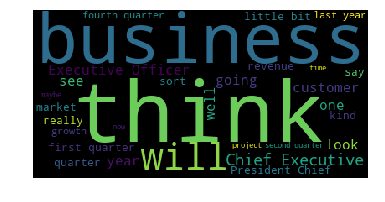

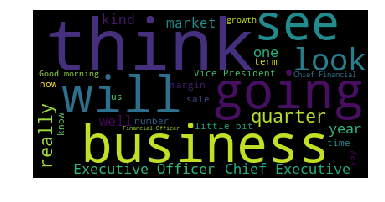

<Figure size 432x288 with 0 Axes>

In [15]:
# testing each one of the word match groups created above:
from os import path
from wordcloud import WordCloud
#d = path.dirname(__file__)
# Read the whole text.
#text = open(path.join(d, 'constitution.txt')).read()
text1 = pw_w
text2 = npw_w
# Generate a word cloud image
wordcloud1 = WordCloud(max_words=30).generate(text1)
wordcloud2 = WordCloud(max_words=30).generate(text2)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots(1,2)
plt.imshow(wordcloud1) 
plt.axis("off")
plt.show()

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

After inspecting positive/negative, litigious and strong/weak modal frequent terms matching with LM finaancial dictionary for each class, profit warning and non-profit warning firm, there is not an apparent reason to believe particular negative/positive words are more used in one class than the other.

Inspecting uncertainty lexicon (charts below) there's a particular observation: profit warning type transcripts contain a much more diversified usage of uncertainty-related vocabulary terms than non-profit warning firms.  

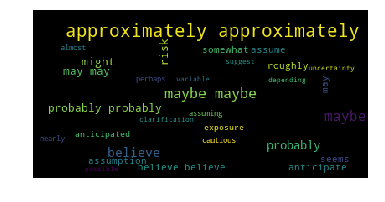

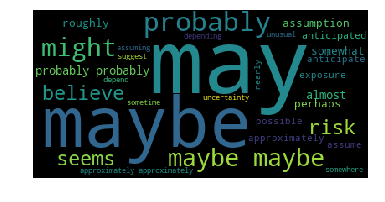

In [77]:
from os import path
from wordcloud import WordCloud
#d = path.dirname(__file__)
# Read the whole text.
#text = open(path.join(d, 'constitution.txt')).read()
text1 = pw_uncert_w
text2 = npw_uncert_w
# Generate a word cloud image
wordcloud1 = WordCloud(max_words=30).generate(text1)
wordcloud2 = WordCloud(max_words=30).generate(text2)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud1) 
plt.axis("off")
plt.show()

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### Bernoulli Naive Bayes 

In [78]:
# 1) define train ([text words], category) to fit the model: 
import sklearn.cross_validation as cv
#x = [x.split() for x in data.loc[:,'Text_str']]
text_l = [x for x in data.loc[:,'Text_str']]
target = list(data['Target'])

#x_train, x_test, y_train, y_test = cv.train_test_split(x, target, test_size=0.20, random_state=0) # Test is 20% data

docs = [(x, y) for x in text_l for y in target]

In [79]:
# 2) Obtain most frequent words as first step to obtain boolean features
import nltk
all_words = clean_padding(' '.join([x for x in data.loc[:,'Text_str']]))
aw_freq = nltk.FreqDist(w.lower() for w in all_words) # dict format
s_aw_freq = sorted(aw_freq.items(), key=lambda x: x[1], reverse=True)
word_features = list(s_aw_freq)[:int(len(list(s_aw_freq))*0.1)] # 10% most important words

In [80]:
# 3) Get boolean features using boolean function and s_aw_freq
def bnb_features(text):
    words = set(clean_padding(text))
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in words)
    return features


In [81]:
# 4) Predictor Features: 
featuresets = [(bnb_features(x), y) for (x,y) in docs]

In [82]:
# 5) Train/Test Split: 
test_size= int(len(featuresets)*0.2)
train_set, test_set = featuresets[:test_size], featuresets[test_size:]

In [83]:
# 6) Fit bnb model:
classifier = nltk.NaiveBayesClassifier.train(train_set)
# 7) Test bnb model:
print 'Training Error', 1- nltk.classify.accuracy(classifier, train_set)
print 'Test Error', 1- nltk.classify.accuracy(classifier, test_set)

Training Error 0.46038172354
Test Error 0.449421965318


In [84]:
print featuresets[1:5]
#nltk.NaiveBayesClassifier.prob_classify_many(classifier, test_set )

[({"contains((u'roughly', 131))": False, "contains((u'fleet', 134))": False, "contains((u'r', 61))": False, "contains((u'rate', 812))": False, "contains((u'hey', 281))": False, "contains((u'consistent', 242))": False, "contains((u'sensors', 67))": False, "contains((u'sequentially', 108))": False, "contains((u'investment', 331))": False, "contains((u'meaningful', 65))": False, "contains((u'$11', 55))": False, "contains((u'detail', 139))": False, "contains((u'revenue', 1047))": False, "contains((u'industrial', 567))": False, "contains((u'incremental', 180))": False, "contains((u'wes', 69))": False, "contains((u'introduce', 68))": False, "contains((u'continued', 488))": False, "contains((u'rob', 187))": False, "contains((u'september', 114))": False, "contains((u'programs', 468))": False, "contains((u'ramp', 172))": False, "contains((u'9', 66))": False, "contains((u'scott', 159))": False, "contains((u'front', 129))": False, "contains((u'couple', 551))": False, "contains((u'selling', 93))":

** Bootstrapping**

Results are not much better when peforming some bagging validation tests:

In [85]:
from sklearn.utils import resample
test_size= int(len(featuresets)*0.2)
x = featuresets
train_score=[]
test_score=[]
for i in range(15):
    train_boot = resample(x)
    train_set, test_set = train_boot[:test_size], train_boot[test_size:]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    train_s = nltk.classify.accuracy(classifier, train_set)
    test_s = nltk.classify.accuracy(classifier, test_set)
    train_score.append(train_s)
    test_score.append(test_s)

print "The mean Training Error is: " + str(1-np.mean(train_score, 0))
print "The mean Test Error is: " + str(1-np.mean(test_score, 0))

The mean Training Error is: 0.4498168498168499
The mean Test Error is: 0.4494605009633912


### Sentence Sentiment Analysis: NLTK VADER LIBRARY

NLTK VADER implements the grammatical and syntactical rules described in the paper: 

http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

- VADER incorporates empirically derived quantifications for the impact of each rule on the perceived intensity of sentiment in sentence-level text. 
- Importantly, these heuristics go beyond what would normally be captured in a typical bag-of-words model. 
- VADER incorporates word-order sensitive relationships between terms such as degree modifiers aka intensifiers, booster words, or degree adverbs. 
- Degree modifiers impact the degree of sentiment by either increasing or decreasing the intensity.

About VADER scoring:

**Compound score** is computed by summing the valence scores of each word in the lexicon: 
- adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). - This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. 
- Calling it a 'normalized, weighted composite score' is accurate.

**pos**, **neu**, and **neg** scores are ratios for proportions of text that fall in each category:
- These should all add up to be 1... or close to it with float operation). 
- These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [375]:
# WARNING: DO NOT EXECUTE => THEY ARE  ALREADY IN OUR IMPORTED data.json FILE

# VADER Sentiment - Entire Text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import nltk
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
v_neg=[]
v_neu=[]
v_pos=[]
v_comp=[]

for text in data.loc[:,'Text']:     
    list_neg=[]; list_neu=[]; list_pos=[]; list_comp=[]
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        list_neg.append(vs['neg'])
        list_neu.append(vs['neu'])
        list_pos.append(vs['pos'])
        list_comp.append(vs['compound'])

    v_neg.append(np.average(filter(lambda x: x!=0, list_neg)))
    v_neu.append(np.average(filter(lambda x: x!=0, list_neu)))
    v_pos.append(np.average(filter(lambda x: x!=0, list_pos)))
    v_comp.append(np.average(filter(lambda x: x!=0, list_comp)))

data['v_neg'] = v_neg
data['v_neu'] = v_neu
data['v_pos'] = v_pos
data['v_comp'] = v_comp

In [376]:
# WARNING: DO NOT EXECUTE => THEY ARE  ALREADY IN OUR IMPORTED data.json FILE

# VADER Sentiment - MD Part
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import nltk
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
v_neg=[]
v_neu=[]
v_pos=[]
v_comp=[]

for text in data.loc[:,'Text_MD']:     
    list_neg=[]; list_neu=[]; list_pos=[]; list_comp=[]
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        list_neg.append(vs['neg'])
        list_neu.append(vs['neu'])
        list_pos.append(vs['pos'])
        list_comp.append(vs['compound'])

    v_neg.append(np.average(filter(lambda x: x!=0, list_neg)))
    v_neu.append(np.average(filter(lambda x: x!=0, list_neu)))
    v_pos.append(np.average(filter(lambda x: x!=0, list_pos)))
    v_comp.append(np.average(filter(lambda x: x!=0, list_comp)))

data['v_neg_MD'] = v_neg
data['v_neu_MD'] = v_neu
data['v_pos_MD'] = v_pos
data['v_comp_MD'] = v_comp

In [385]:
# WARNING: DO NOT EXECUTE => THEY ARE  ALREADY IN OUR IMPORTED data.json FILE

# VADER Sentiment - QA Part
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import nltk
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
v_neg=[]
v_neu=[]
v_pos=[]
v_comp=[]

for text in data.loc[:,'Text_QA']:     
    list_neg=[]; list_neu=[]; list_pos=[]; list_comp=[]
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        list_neg.append(vs['neg'])
        list_neu.append(vs['neu'])
        list_pos.append(vs['pos'])
        list_comp.append(vs['compound'])

    v_neg.append(np.average(filter(lambda x: x!=0, list_neg)))
    v_neu.append(np.average(filter(lambda x: x!=0, list_neu)))
    v_pos.append(np.average(filter(lambda x: x!=0, list_pos)))
    v_comp.append(np.average(filter(lambda x: x!=0, list_comp)))

data['v_neg_QA'] = v_neg
data['v_neu_QA'] = v_neu
data['v_pos_QA'] = v_pos
data['v_comp_QA'] = v_comp

As the tables below display, Profit warning transcripts seem to be slightly more negative than non-profit warning firms. Monitoring the tone of a particular company overtime hence could provide clues about where overall sentiment is trending and its profit warning probability.     

In [86]:
data.groupby('Target').agg(['mean','median','std'])[['v_neg','v_neg_MD','v_neg_QA']]

v_neg                      v_neg_MD                      v_neg_QA  \
            mean    median       std      mean    median       std      mean   
Target                                                                         
0       0.055748  0.051468  0.017158  0.049968  0.047462  0.013082  0.058274   
1       0.064728  0.059749  0.023757  0.060653  0.059584  0.014559  0.070165   

                            
          median       std  
Target                      
0       0.053629  0.023065  
1       0.056035  0.047815

In [87]:
data.groupby('Target').agg(['mean','median','std'])[['v_neu','v_neu_MD','v_neu_QA']]

v_neu                     v_neu_MD                      v_neu_QA  \
            mean    median       std     mean    median       std      mean   
Target                                                                        
0       0.872549  0.874067  0.028071  0.88331  0.885462  0.018070  0.870363   
1       0.887274  0.889134  0.025609  0.88563  0.885739  0.016426  0.890058   

                            
          median       std  
Target                      
0       0.870574  0.035438  
1       0.891679  0.038740

In [88]:
data.groupby('Target').agg(['mean','median','std'])[['v_pos','v_pos_MD','v_pos_QA']]

v_pos                      v_pos_MD                      v_pos_QA  \
            mean    median       std      mean    median       std      mean   
Target                                                                         
0       0.226581  0.230302  0.050548  0.157773  0.159455  0.022721  0.257443   
1       0.197330  0.204347  0.044381  0.148508  0.149934  0.019454  0.229813   

                            
          median       std  
Target                      
0       0.276054  0.067989  
1       0.227537  0.066902

### PCA and Logit: Revisiting the model using Sentiment Indicators

In [89]:
print  map(lambda x:x.encode('utf-8','ignore'),data)

['ARI_Grade_idx', 'ARI_Grade_idx_MD', 'ARI_Grade_idx_QA', 'Best_Grade_idx', 'Best_Grade_idx_MD', 'Best_Grade_idx_QA', 'CL_Grade_idx', 'CL_Grade_idx_MD', 'CL_Grade_idx_QA', 'DC_dif_words', 'DC_dif_words_MD', 'DC_dif_words_QA', 'DC_idx', 'DC_idx_MD', 'DC_idx_QA', 'Date', 'FE_idx', 'FE_idx_MD', 'FE_idx_QA', 'FK_Grade_idx', 'FK_Grade_idx_MD', 'FK_Grade_idx_QA', 'GFox_Grade_idx', 'GFox_Grade_idx_MD', 'GFox_Grade_idx_QA', 'LW_Grade_idx', 'LW_Grade_idx_MD', 'LW_Grade_idx_QA', 'Month', 'Name', 'Num_sent', 'Num_sent_MD', 'Num_sent_QA', 'Num_syl', 'Num_syl_MD', 'Num_syl_QA', 'Num_words', 'Num_words_MD', 'Num_words_QA', 'Padding', 'Padding_MD', 'Padding_QA', 'Period', 'Polarity', 'Polarity_QA', 'Size', 'Size_MD', 'Size_QA', 'Smog_Grade_idx', 'Smog_Grade_idx_MD', 'Smog_Grade_idx_QA', 'Subjectivity', 'Subjectivity_QA', 'Target', 'Text', 'Text_MD', 'Text_QA', 'Text_str', 'Year', 'cons_perc_abs', 'cons_perc_rel', 'int_perc_abs', 'int_perc_rel', 'irv_perc_abs', 'irv_perc_rel', 'lit_perc_abs', 'lit_per

In [90]:
import numpy as np
# Get only readability predictors:
data_sent= data[[ 'Polarity', 'Polarity_QA', 'Subjectivity', 'Subjectivity_QA',
                 'neg_perc_abs', 'neg_perc_rel', 'pos_perc_abs', 'pos_perc_rel','unc_perc_abs', 'unc_perc_rel',
                 'v_comp', 'v_comp_MD', 'v_comp_QA', 'v_neg', 'v_neg_MD', 'v_neg_QA', 'v_neu', 'v_neu_MD', 'v_neu_QA',
                 'v_pos', 'v_pos_MD', 'v_pos_QA', 'w_mod_perc_abs', 'w_mod_perc_rel'
                ]]

data_sent.fillna(np.nanmean(data_sent),inplace=True)
len(data_sent.columns) # 24 numerical predictors
data_sent.describe() # you need to scale first

/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Polarity,Polarity_QA,Subjectivity,Subjectivity_QA,neg_perc_abs,neg_perc_rel,pos_perc_abs,pos_perc_rel,unc_perc_abs,unc_perc_rel,...,v_neg_MD,v_neg_QA,v_neu,v_neu_MD,v_neu_QA,v_pos,v_pos_MD,v_pos_QA,w_mod_perc_abs,w_mod_perc_rel
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.094675,-0.047669,0.068451,0.069818,0.018872,0.187972,0.028705,0.286304,0.015562,0.153723,...,0.054794,0.065587,0.879199,0.884357,0.879257,0.213371,0.153589,0.245192,0.007331,0.072351
std,0.147835,0.202291,0.009777,0.046538,0.004658,0.043206,0.005006,0.046664,0.004245,0.034157,...,0.014699,0.041173,0.027835,0.017293,0.038059,0.049806,0.021697,0.068170,0.002250,0.018539
min,-0.227848,-0.999999,0.049780,0.042358,0.011325,0.110333,0.017044,0.177453,0.007700,0.088235,...,0.027500,0.023455,0.778887,0.836053,0.762396,0.109614,0.108308,0.091524,0.003347,0.034301
25%,-0.010830,-0.159091,0.062305,0.057247,0.015445,0.152244,0.025709,0.262821,0.012478,0.127358,...,0.044750,0.046639,0.860199,0.873145,0.857936,0.178993,0.138208,0.199177,0.005526,0.057812
50%,0.092784,-0.051163,0.066434,0.062940,0.018042,0.182830,0.028696,0.283159,0.015212,0.151852,...,0.053143,0.054647,0.880331,0.885531,0.875645,0.214071,0.153585,0.247348,0.007283,0.071942
75%,0.211268,0.070968,0.073845,0.071634,0.021394,0.219643,0.031618,0.314935,0.018049,0.175497,...,0.063600,0.068679,0.898970,0.898300,0.901714,0.247414,0.166529,0.300054,0.008321,0.084071
max,0.478927,0.454545,0.101510,0.500000,0.030227,0.297170,0.046953,0.429072,0.037829,0.343284,...,0.096667,0.318333,0.934839,0.917956,1.000000,0.317834,0.212932,0.360683,0.016802,0.129657


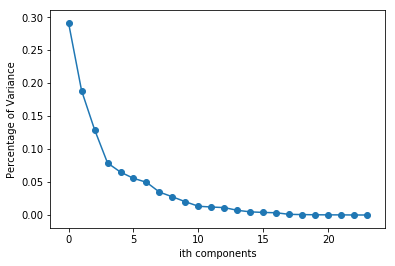

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
pca = PCA()

data_sent_s = data_sent / np.std(data_sent,0) # scaling for PCA

# Checking what number of PCs are best to wok with: 
pca.set_params(n_components = None)
pca.fit(data_sent_s)
plt.plot(range(len(data_sent_s.columns)), pca.explained_variance_ratio_)
plt.scatter(range(len(data_sent_s.columns)), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
pca.set_params(n_components = 12) # only obtain 3 PCs = p
pca.fit(data_sent_s)

print 'Aggregated Explained Variance', 100*round(sum(pca.explained_variance_ratio_),2)
print '*'*65
print 'Explained Variance per  PC:'
print '*'*65
print pca.explained_variance_ratio_
print '*'*65
print 'PCA Eigenvectors'
print '*'*65
print pca.components_ # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs
print '*'*65
print 'PCs'
print '*'*65
print pca.transform(data_sent_s) # WARNING: these are eigenvectors, not PCs => remember PCs live in the obs space so 3x3 matrix doesn't make sense for PCs


Aggregated Explained Variance 97.0
*****************************************************************
Explained Variance per  PC:
*****************************************************************
[0.29093718 0.18858639 0.1295608  0.07894691 0.06509019 0.05566414
 0.04966892 0.03478698 0.02764545 0.02016397 0.01333225 0.01217238]
*****************************************************************
PCA Eigenvectors
*****************************************************************
[[-2.72890483e-01 -2.32800580e-01  1.79778425e-01  1.56133566e-01
   2.63248547e-01  2.63840858e-01 -2.48377096e-01 -2.93735102e-01
   4.61276439e-02  2.95441609e-02 -2.88536979e-01 -2.80918684e-01
  -2.37584087e-01  1.41807346e-01  2.11190257e-01  1.19516380e-01
   1.99809778e-01  1.91230542e-01  1.93070503e-01 -2.04614390e-01
  -2.03748579e-01 -1.65148469e-01  4.06448099e-02  3.26658027e-02]
 [ 1.92094426e-01  2.05248202e-02 -7.11467702e-02  1.71308292e-01
  -1.93759301e-01 -2.88996471e-01  1.28504787e-01  1.78593

In [61]:
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import sklearn.metrics as metrics

logit = lm.LogisticRegression()

pred = data_sent_s
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

# PCA Training
pca.set_params(n_components = 12) # only obtain 7 PCs => from our previous analysis
pca.fit(x_train)
x_train = pca.transform(x_train) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 
x_test = pca.transform(x_test) # Use 7 PCs as predictors to reduce complexity from the original 36 predictors 

# Logit 
logit.fit(x_train, y_train)
print "The training error is: %.4f" %(1-logit.score(x_train, y_train))
print "The test error is: %.4f" %(1-logit.score(x_test, y_test))
y_train_p = logit.predict_proba(x_train)
y_test_p = logit.predict_proba(x_test)
print 'Training Multi Class Log_loss:', metrics.log_loss(y_train,y_train_p)
print 'Test Multi Class Log_loss:', metrics.log_loss(y_test,y_test_p)

The training error is: 0.1486
The test error is: 0.2105
Training Multi Class Log_loss: 0.398282697455
Test Multi Class Log_loss: 0.541899051837


In [62]:
# Cross-Validation
import sklearn.cross_validation as cv
stratify_divide = cv.StratifiedKFold(y_train, 5, random_state=0)
scores = cv.cross_val_score(logit, x_train, y_train, cv=stratify_divide)
print 'CV Error rates per fold:', 1- scores
print 'CV Average Error', 1-np.mean(scores)
print 'CV Error Std. Dev', np.std(scores)

CV Error rates per fold: [ 0.13333333  0.2         0.2         0.26666667  0.21428571]
CV Average Error 0.202857142857
CV Error Std. Dev 0.0425491579118


### Random Forest

#### Using Readability features dataframe: data_gr

In [75]:
# Split Train/Test data:
import sklearn.cross_validation as cv
import sklearn.metrics as metrics

pred = data_gr
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

In [83]:
# Fine-tune RF model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

randomForest = ensemble.RandomForestClassifier()
np.random.seed(1)

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10), "min_samples_split": np.linspace(2, 30, 15), \
                    'max_features':['auto','log2',10]}]
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [85]:
## best parameter
grid_search_forest.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2.0,
 'n_estimators': 10}

In [91]:
## best and overall score
print 'Best Score:',grid_search_forest.best_score_
print 'Best Error:',1- grid_search_forest.best_score_
print 65*'*'
print 'Overall Training Score:', grid_search_forest.score(x_train,y_train)  
print 'Overall Training Error', 1-grid_search_forest.score(x_train,y_train)
y_train_p = grid_search_forest.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print 65*'*'
print 'Overall Test Score:', grid_search_forest.score(x_test,y_test)  
print 'Overall Test Error', 1-grid_search_forest.score(x_test,y_test)
y_test_p = grid_search_forest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Best Score: 0.824324324324
Best Error: 0.175675675676
*****************************************************************
Overall Training Score: 0.986486486486
Overall Training Error 0.0135135135135
Overall Training Log-Loss Error 0.173891635834
*****************************************************************
Overall Test Score: 0.789473684211
Overall Test Error 0.210526315789
Overall Test Log-Loss Error 0.500945038559


In [94]:
# Best Model Training:
randomForest = ensemble.RandomForestClassifier(criterion='entropy',max_features= 'log2', min_samples_leaf= 2, \
                                               min_samples_split= 2.0, n_estimators= 10)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2.0,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Generalization error seems to be huge using our best model: Train Log-Loss 0.20 vs 0.63 Test Log-Loss 

In [96]:
print 'Best Training Score:',randomForest.score(x_train,y_train)
print 'Best Training Error:',1- randomForest.score(x_train,y_train)
y_train_p = randomForest.predict_proba(x_train)
print 'Overall Train Log-Loss Error', metrics.log_loss(y_train,y_train_p)

print 'Best Test Score:',randomForest.score(x_test,y_test)
print 'Best Test Error:',1- randomForest.score(x_test,y_test)
y_test_p = randomForest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

 Best Training Score: 0.959459459459
Best Training Error: 0.0405405405405
Overall Train Log-Loss Error 0.205349545609
Best Test Score: 0.789473684211
Best Test Error: 0.210526315789
Overall Test Log-Loss Error 0.630034681957


#### Using Sentiment features dataframe: data_sent

In [107]:
# Split Train/Test data:
import sklearn.cross_validation as cv
import sklearn.metrics as metrics

pred = data_sent
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

In [108]:
# Fine-tune RF model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

randomForest = ensemble.RandomForestClassifier()
np.random.seed(1)

grid_para_forest = [{"n_estimators": [10, 50, 100], "criterion": ["gini", "entropy"], \
                    "min_samples_leaf": range(1, 10), "min_samples_split": np.linspace(2, 30, 15), \
                    'max_features':['auto','log2',10]}]
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [109]:
## best parameter
grid_search_forest.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2.0,
 'n_estimators': 50}

In [110]:
## best and overall score
print 'Best Score:',grid_search_forest.best_score_
print 'Best Error:',1- grid_search_forest.best_score_
print 65*'*'
print 'Overall Training Score:', grid_search_forest.score(x_train,y_train)  
print 'Overall Training Error', 1-grid_search_forest.score(x_train,y_train)
y_train_p = grid_search_forest.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print 65*'*'
print 'Overall Test Score:', grid_search_forest.score(x_test,y_test)  
print 'Overall Test Error', 1-grid_search_forest.score(x_test,y_test)
y_test_p = grid_search_forest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Best Score: 0.851351351351
Best Error: 0.148648648649
*****************************************************************
Overall Training Score: 1.0
Overall Training Error 0.0
Overall Training Log-Loss Error 0.25034662346
*****************************************************************
Overall Test Score: 0.578947368421
Overall Test Error 0.421052631579
Overall Test Log-Loss Error 0.634925214935


In [111]:
# Best Model Training:
randomForest = ensemble.RandomForestClassifier(criterion='gini',max_features= 'log2', min_samples_leaf= 3, \
                                               min_samples_split= 2.0, n_estimators= 50)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=2.0,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
print 'Best Training Score:',randomForest.score(x_train,y_train)
print 'Best Training Error:',1- randomForest.score(x_train,y_train)
y_train_p = randomForest.predict_proba(x_train)
print 'Overall Train Log-Loss Error', metrics.log_loss(y_train,y_train_p)

print 'Best Test Score:',randomForest.score(x_test,y_test)
print 'Best Test Error:',1- randomForest.score(x_test,y_test)
y_test_p = randomForest.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Best Training Score: 0.986486486486
Best Training Error: 0.0135135135135
Overall Train Log-Loss Error 0.269031423965
Best Test Score: 0.578947368421
Best Test Error: 0.421052631579
Overall Test Log-Loss Error 0.626050685992


Results with data_sentiment are much worse than worse than with data_gr

### XGBoosting

#### Using Readability features dataframe: data_gr

In [4]:
# Split Train/Test data:
import sklearn.cross_validation as cv
import sklearn.metrics as metrics

pred = data_gr
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

In [5]:
# Xgboost Install
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_For_Anaconda_on_Windows?lang=en
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [58]:
# XGBOOST: Great Guide 
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# http://machinelearningmastery.com/stochastic-gradient-boosting-xgboost-scikit-learn-python/
import numpy as np
import pandas as pd
import xgboost as xgb
#from sklearn import preprocessing, model_selection
import string
from scipy.stats import boxcox
from scipy import sparse

SEED = 777
# parameters info: https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
params = {
    'eta':.01, # learning rate. values between 0.01 and 0.001 are recommended
    'max_depth':2, # maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting
    'colsample_bytree':.8, # (0,1] => subsample ratio of columns when constructing each tree.
    'subsample':.8,
    'seed':0,
    'nthread':16, # number of parallel threads used to run xgboost. default is set to max number of threads avail
    'objective':'multi:softprob', #"multi:softprob" same as softmax, but output contains predicted probability of each data point belonging to each class.
    'eval_metric':'mlogloss',
    'num_class':2, # number of Target classes to predict
    'silent':1 # 0 means printing running messages, 1 means silent mode.
}

dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test)

bst = xgb.cv(params, dtrain, 10000, nfold=5, early_stopping_rounds=50, verbose_eval=25)
#best_rounds = np.argmin(bst['test-mlogloss-mean'])


[0]	train-mlogloss:0.690279+0.000432313	test-mlogloss:0.691275+0.000465711
[25]	train-mlogloss:0.627469+0.00578776	test-mlogloss:0.664171+0.00917864
[50]	train-mlogloss:0.577151+0.00880508	test-mlogloss:0.645152+0.0162511
[75]	train-mlogloss:0.534509+0.0140749	test-mlogloss:0.632853+0.0204474
[100]	train-mlogloss:0.4988+0.0162677	test-mlogloss:0.625117+0.0253063
[125]	train-mlogloss:0.469045+0.0179202	test-mlogloss:0.616905+0.0316174
[150]	train-mlogloss:0.442153+0.0187413	test-mlogloss:0.610591+0.0342222
[175]	train-mlogloss:0.418116+0.0194036	test-mlogloss:0.60542+0.0385941
[200]	train-mlogloss:0.3962+0.0193577	test-mlogloss:0.601235+0.0421075
[225]	train-mlogloss:0.3761+0.0187322	test-mlogloss:0.59709+0.0465123
[250]	train-mlogloss:0.358047+0.0177973	test-mlogloss:0.594999+0.0511181
[275]	train-mlogloss:0.341207+0.0168611	test-mlogloss:0.593918+0.0546794
[300]	train-mlogloss:0.325376+0.0168718	test-mlogloss:0.595553+0.0601009
[325]	train-mlogloss:0.31144+0.0163764	test-mlogloss:0.59

In [59]:
# CV: Training and Test(Validation)
print 'Best Iteration Log-Loss', bst.loc[bst_t.best_iteration]

Best Iteration Log-Loss test-mlogloss-mean     0.592048
test-mlogloss-std      0.068349
train-mlogloss-mean    0.285134
train-mlogloss-std     0.014408
Name: 375, dtype: float64


In [60]:
# Best Model Train
bst_t = xgb.train(params, dtrain, best_rounds)
# Predict Test 
preds = bst_t.predict(dtest)
# problem is that xgb originally doesn;t provide the same score() and predict_proba() as skleanr
# SOLUTION: fortunately xgb comes with an sklearn API
# from xgboost import XGBClassifier


In [82]:
# USING SKLEARN API
# http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
import numpy as np
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import string
from scipy.stats import boxcox
from scipy import sparse

import sklearn.cross_validation as cv
import sklearn.metrics as metrics

SEED = 777
# parameters info: https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
params = {
    'eta':.01, # learning rate. values between 0.01 and 0.001 are recommended
    'max_depth':2, # maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting
    'colsample_bytree':.8, # (0,1] => subsample ratio of columns when constructing each tree.
    'subsample':.8,
    'seed':0,
    'nthread':16, # number of parallel threads used to run xgboost. default is set to max number of threads avail
    'objective':'multi:softprob', #"multi:softprob" same as softmax, but output contains predicted probability of each data point belonging to each class.
    'eval_metric':'mlogloss',
    'num_class':2, # number of Target classes to predict
    'silent':1 # 0 means printing running messages, 1 means silent mode.
}

pred = data_gr
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

bst_sk = xgb.XGBClassifier()
bst_sk.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [132]:
print 'Training Score',bst_sk.score(x_train,y_train)
print 'Training Error',1 - bst_sk.score(x_train,y_train)
y_train_p = bst_sk.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print '*'*65
print 'Test Score',bst_sk.score(x_test,y_test)
print 'Test Error',1 - bst_sk.score(x_test,y_test)
y_test_p = bst_sk.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Training Score 1.0
Training Error 0.0
Overall Training Log-Loss Error 0.0606525307458
*****************************************************************
Test Score 0.842105263158
Test Error 0.157894736842
Overall Test Log-Loss Error 0.529266862542


In [135]:
# Fine-tune XGB model to find the best model:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

#label_enc_y = LabelEncoder().fit_transform(y_train)

xgb_model = xgb.XGBClassifier()

np.random.seed(1)

# Important: EXCLUDE 'objective' IN THE PARAMETERS BELOW FOR sklearn.xgboost to work properly
# http://stackoverflow.com/questions/35384977/xgbclassifier-num-class-is-invalid

grid_para = [{ 'max_depth':[2,3], # max tree depth for base learners 
              'learning_rate':[0.01,0.005], # = eta
              'n_estimators':[1000, 5000, 10000], # num of boosted trees to fit
              'nthread':[16],
              'colsample_bytree':[0.8]
             }]

grid_xgb = gs.GridSearchCV(xgb_model, grid_para, scoring='accuracy', cv=5)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1000, 5000, 10000], 'learning_rate': [0.01, 0.005], 'colsample_bytree': [0.8], 'max_depth': [2, 3], 'nthread': [16]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [136]:
# Best Parameters
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.005,
 'max_depth': 3,
 'n_estimators': 5000,
 'nthread': 16}

In [137]:
print 'Training Score',grid_xgb.best_estimator_.score(x_train,y_train)
print 'Training Error',1 - grid_xgb.best_estimator_.score(x_train,y_train)
y_train_p = grid_xgb.best_estimator_.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print '*'*65
print 'Test Score',grid_xgb.best_estimator_.score(x_test,y_test)
print 'Test Error',1 - grid_xgb.best_estimator_.score(x_test,y_test)
y_test_p = grid_xgb.best_estimator_.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Training Score 1.0
Training Error 0.0
Overall Training Log-Loss Error 0.0408724087913
*****************************************************************
Test Score 0.842105263158
Test Error 0.157894736842
Overall Test Log-Loss Error 0.527723529866


#### Using Sentiment+Syntax+Semantic features dataframe: data_sent

In [139]:
# USING SKLEARN API
# http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
import numpy as np
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import string
from scipy.stats import boxcox
from scipy import sparse

import sklearn.cross_validation as cv
import sklearn.metrics as metrics

SEED = 777
# parameters info: https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
params = {
    'eta':.01, # learning rate. values between 0.01 and 0.001 are recommended
    'max_depth':2, # maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting
    'colsample_bytree':.8, # (0,1] => subsample ratio of columns when constructing each tree.
    'subsample':.8,
    'seed':0,
    'nthread':16, # number of parallel threads used to run xgboost. default is set to max number of threads avail
    'objective':'multi:softprob', #"multi:softprob" same as softmax, but output contains predicted probability of each data point belonging to each class.
    'eval_metric':'mlogloss',
    'num_class':2, # number of Target classes to predict
    'silent':1 # 0 means printing running messages, 1 means silent mode.
}

pred = data_sent
target = data['Target']

x_train, x_test, y_train, y_test = cv.train_test_split(pred, target, test_size=0.20, random_state=0) # Test is 20% data

bst_sk = xgb.XGBClassifier()
bst_sk.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [140]:
print 'Training Score',bst_sk.score(x_train,y_train)
print 'Training Error',1 - bst_sk.score(x_train,y_train)
y_train_p = bst_sk.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print '*'*65
print 'Test Score',bst_sk.score(x_test,y_test)
print 'Test Error',1 - bst_sk.score(x_test,y_test)
y_test_p = bst_sk.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Training Score 1.0
Training Error 0.0
Overall Training Log-Loss Error 0.0563247301679
*****************************************************************
Test Score 0.684210526316
Test Error 0.315789473684
Overall Test Log-Loss Error 0.762976357223


In [141]:
# Fine-tune XGB model to find the best model:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import log_loss, accuracy_score
import sklearn.grid_search as gs

#label_enc_y = LabelEncoder().fit_transform(y_train)

xgb_model = xgb.XGBClassifier()

np.random.seed(1)

# Important: EXCLUDE 'objective' IN THE PARAMETERS BELOW FOR sklearn.xgboost to work properly
# http://stackoverflow.com/questions/35384977/xgbclassifier-num-class-is-invalid

grid_para = [{ 'max_depth':[2,3], # max tree depth for base learners 
              'learning_rate':[0.01,0.005], # = eta
              'n_estimators':[1000, 5000, 10000], # num of boosted trees to fit
              'nthread':[16],
              'colsample_bytree':[0.8]
             }]

grid_xgb = gs.GridSearchCV(xgb_model, grid_para, scoring='accuracy', cv=5)
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1000, 5000, 10000], 'learning_rate': [0.01, 0.005], 'colsample_bytree': [0.8], 'max_depth': [2, 3], 'nthread': [16]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [144]:
# Best Parameters
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 10000,
 'nthread': 16}

In [147]:
print 'Training Score',grid_xgb.best_estimator_.score(x_train,y_train)
print 'Training Error',1 - grid_xgb.best_estimator_.score(x_train,y_train)
y_train_p = grid_xgb.best_estimator_.predict_proba(x_train)
print 'Overall Training Log-Loss Error', metrics.log_loss(y_train,y_train_p)
print '*'*65
print 'Test Score',grid_xgb.best_estimator_.score(x_test,y_test)
print 'Test Error',1 - grid_xgb.best_estimator_.score(x_test,y_test)
y_test_p = grid_xgb.best_estimator_.predict_proba(x_test)
print 'Overall Test Log-Loss Error', metrics.log_loss(y_test,y_test_p)

Training Score 1.0
Training Error 0.0
Overall Training Log-Loss Error 0.0292376300801
*****************************************************************
Test Score 0.631578947368
Test Error 0.368421052632
Overall Test Log-Loss Error 0.792462499984


In [ ]:
data.to_json('data_new_var.json')
# Double-Check
data_new_var=pd.read_json('data_new_var.json')
data_new_var.columns